In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from model import RGC2LGN
from model import LGN2V1

## some prep for the test images

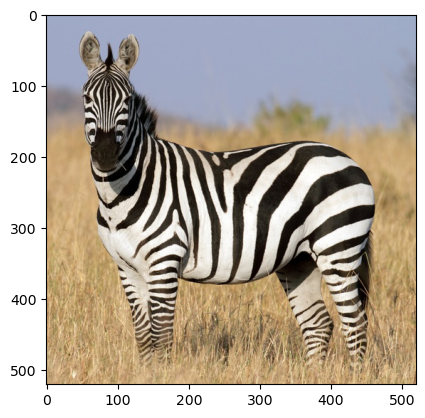

In [2]:
test_img = cv2.imread("/Users/sakinkirti/Programming/ucla/dipoppa-lab/01_data/test_images/zebra.jpg")
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [3]:
# resize the test images so they are consistent
import glob

image_files = glob.glob("/Users/sakinkirti/Programming/ucla/dipoppa-lab/01_data/test_images/*.jpg")
for f in image_files:
    img = cv2.imread(f)
    img_resized = cv2.resize(img, (224, 224))
    cv2.imwrite(f, img_resized)

## testing whether RGC-LGN produces gaussian features

In [3]:
# okay, i'd like to check if the RGC2LGN model properly produces a set of gaussian features
import torch 
import glob

test_imgs = [torch.Tensor(cv2.imread(f).T) for f in glob.glob("/Users/sakinkirti/Programming/ucla/dipoppa-lab/01_data/test_images/*.jpg")]
print(f"Loaded {len(test_imgs)} test images.")
print(f"Each image has shape: {test_imgs[0].shape}") # should be (3, 224, 224)

R2L = RGC2LGN(sigmas=(0.8, 1.6, 3.2, 6.4, 12.8), kernel_size=None, channels=3)
lgn_rep = R2L(torch.stack(test_imgs)) # add batch dim
print(f"Output shape is {lgn_rep.shape}") # should be (5, 3 * 5 = 15) since 5 images, 3 channels * 5 sigmas

Loaded 5 test images.
Each image has shape: torch.Size([3, 224, 224])
Output shape is torch.Size([5, 15])


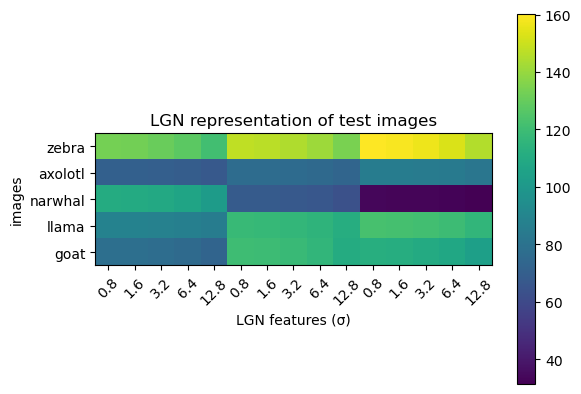

In [12]:
lgn_out_np = lgn_rep.detach().numpy()

plt.imshow(lgn_out_np, cmap='viridis')
plt.title("LGN representation of test images")
plt.ylabel("images")
plt.yticks(ticks=np.arange(len(test_imgs)), labels=[f.split("/")[-1].split(".")[0] for f in glob.glob("/Users/sakinkirti/Programming/ucla/dipoppa-lab/01_data/test_images/*.jpg")])
plt.xlabel("LGN features (σ)")
plt.xticks(ticks=np.arange(lgn_out_np.shape[1]), labels=[f"{sigma:.1f}" for sigma in [0.8, 1.6, 3.2, 6.4, 12.8] * 3], rotation=45)
plt.colorbar()
plt.show()

In [22]:
from utils import Utils as u
triplets, labels = u.load_mat("/Users/sakinkirti/Programming/ucla/dipoppa-lab/01_data/digits/triplet_digits_2.mat", mat_key="triplets")

In [31]:
labels[0][69775]

np.uint8(2)